<a href="https://colab.research.google.com/github/RinaParikh/Autoencoder/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.layers import Input, Dense, Conv2D, UpSampling2D
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
input_img = Input(shape=(784,))
input_img_conv = Input(shape=(28, 28, 1))
encoding_dim = 32


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.reshape(x_train,(60000,784))
x_test= np.reshape(x_test,(10000,784))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


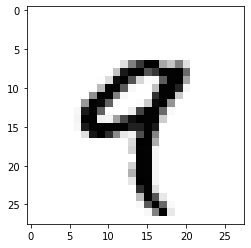

ValueError: ignored

In [0]:
plt.imshow(x_train[4].reshape(28,28), cmap='Greys')
plt.show()

encoded = Dense(encoding_dim, activation='relu')(input_img)
#print(encoded)
#plt.imshow(encoded.reshape(-1,28,28,1))
#plt.show()
decoded = Dense(784, activation='sigmoid')(encoded)
img = decoded.reshape(-1,28,28,1)
plt.imshow(img)
plt.show()

In [0]:
input_img = x_train[4]
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=5,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.1384 - val_loss: 0.1175
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1110 - val_loss: 0.1040
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1021 - val_loss: 0.0983
Epoch 4/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0985 - val_loss: 0.0964
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0970 - val_loss: 0.0950


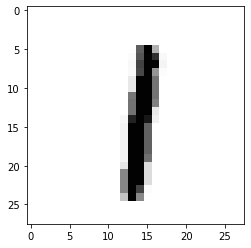

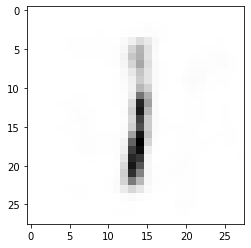

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[40].reshape(28,28), cmap='Greys')
plt.show()


decoded_imgs = autoencoder.predict(x_test)
plt.imshow(decoded_imgs[40].reshape(28,28), cmap='Greys')
plt.show()


